In [1]:
import pandas as pd 
import numpy as np 
import ta
from backtester import *

In [2]:
data = pd.read_csv('../forex_prices/m5/EUR_USD_m5.csv', index_col=['date'], parse_dates=['date'])
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2021-07-21 12:35:00,1.17674,1.17632,1.17677,1.17626,1.17686,1.17645,1.17688,1.17638,878
2021-07-21 12:40:00,1.17632,1.17625,1.17646,1.17614,1.17645,1.17638,1.17658,1.17625,1104
2021-07-21 12:45:00,1.17625,1.17594,1.17625,1.17594,1.17638,1.17606,1.17638,1.17606,1328
2021-07-21 12:50:00,1.17594,1.17637,1.17672,1.17591,1.17606,1.17650,1.17685,1.17603,1301
2021-07-21 12:55:00,1.17637,1.17654,1.17663,1.17614,1.17650,1.17667,1.17675,1.17626,1311


(10000, 9)


In [3]:
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)

In [4]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-21 12:35:00,1.17674,1.17632,1.17677,1.17626,1.17686,1.17645,1.17688,1.17638,878,1.176800,1.176825,1.176320,1.176385
2021-07-21 12:40:00,1.17632,1.17625,1.17646,1.17614,1.17645,1.17638,1.17658,1.17625,1104,1.176385,1.176520,1.176195,1.176315
2021-07-21 12:45:00,1.17625,1.17594,1.17625,1.17594,1.17638,1.17606,1.17638,1.17606,1328,1.176315,1.176315,1.176000,1.176000
2021-07-21 12:50:00,1.17594,1.17637,1.17672,1.17591,1.17606,1.17650,1.17685,1.17603,1301,1.176000,1.176785,1.175970,1.176435
2021-07-21 12:55:00,1.17637,1.17654,1.17663,1.17614,1.17650,1.17667,1.17675,1.17626,1311,1.176435,1.176690,1.176200,1.176605


In [5]:
ema_periods = (50, 100, 200)
for i, n in enumerate(ema_periods):
    data[f'ema_{i}'] = ta.trend.ema_indicator(data['close'], window=n, fillna=False)

In [6]:
data.dropna(inplace=True)

In [7]:
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,ema_0,ema_1,ema_2
date,,,,,,,,,,,,,,,,
2021-07-22 05:10:00,1.17944,1.17943,1.17950,1.17942,1.17957,1.17955,1.17961,1.17955,279,1.179505,1.179555,1.179485,1.179490,1.179586,1.179441,1.179010
2021-07-22 05:15:00,1.17943,1.17957,1.17964,1.17944,1.17955,1.17968,1.17976,1.17955,432,1.179490,1.179700,1.179495,1.179625,1.179588,1.179444,1.179016
2021-07-22 05:20:00,1.17957,1.17957,1.17963,1.17951,1.17968,1.17969,1.17975,1.17964,143,1.179625,1.179690,1.179575,1.179630,1.179590,1.179448,1.179022
2021-07-22 05:25:00,1.17957,1.17962,1.17963,1.17955,1.17969,1.17974,1.17974,1.17968,202,1.179630,1.179685,1.179615,1.179680,1.179593,1.179453,1.179029
2021-07-22 05:30:00,1.17962,1.17953,1.17961,1.17943,1.17974,1.17965,1.17974,1.17955,243,1.179680,1.179675,1.179490,1.179590,1.179593,1.179455,1.179034


(9801, 16)


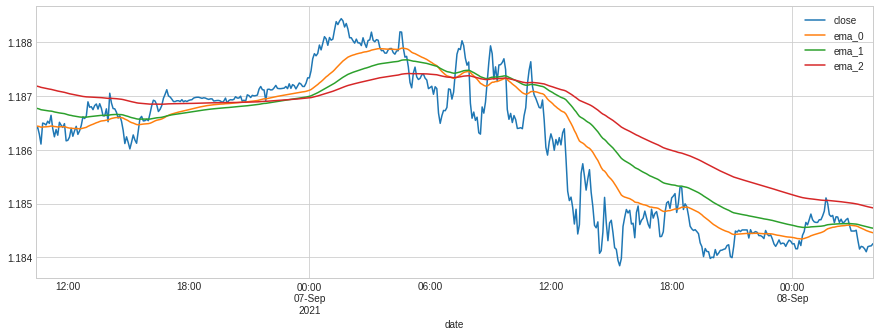

In [8]:
data[['close','ema_0', 'ema_1', 'ema_2']].iloc[-500:].plot(figsize=(15,5))
plt.show()

In [9]:
data['ema_signal'] = np.where(np.all([data['ema_0'] > data['ema_1'],
                                      data['ema_1'] > data['ema_2']], axis=0), 1,
                              np.where(np.all([data['ema_0'] < data['ema_1'],
                                               data['ema_1'] < data['ema_2']], axis=0), -1, 0))

In [10]:
print('Positions')
print(data['ema_signal'].value_counts())
print('-'*50)
print('Positions change')
print(data['ema_signal'].diff(1).apply(np.abs).value_counts())

Positions
-1    4035
 1    3902
 0    1864
Name: ema_signal, dtype: int64
--------------------------------------------------
Positions change
0.0    9657
1.0     142
2.0       1
Name: ema_signal, dtype: int64


In [11]:
backtest = IterativeBacktester(data, data['ema_signal'], 'm5')

In [12]:
backtest.backtest()

  0%|          | 0/9800 [00:00<?, ?it/s]

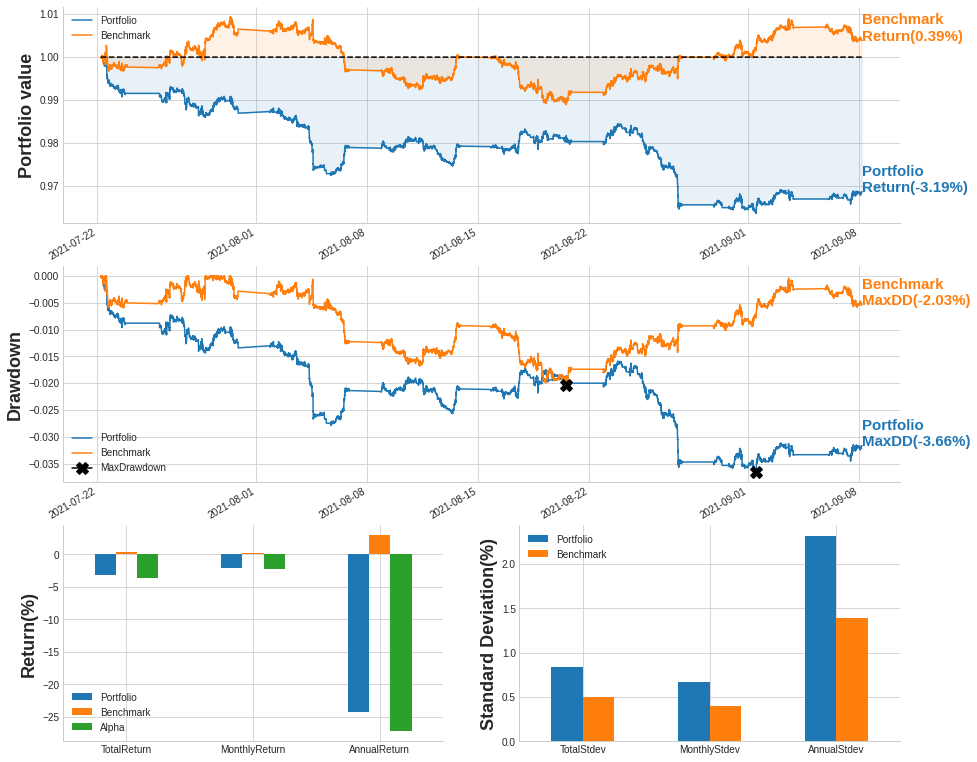

--------------------------------------------------
Data length: |47 days 22:50:00|
Data range from |2021-07-22 05:10:00| to |2021-09-08 04:00:00|
--------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      -3.189 │       0.389 │  -3.578 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │      -2.023 │       0.247 │  -2.270 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │     -24.273 │       2.963 │ -27.236 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │       0.842 │       0.505 │
├─────────────

In [13]:
backtest.results()